In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
amz=pd.read_csv('/content/AMZN.csv')
print(amz.head())
amz.columns

         Date        Open        High         Low       Close   Adj Close  \
0  2022-08-08  142.050003  144.229996  138.289993  139.410004  139.410004   
1  2022-08-09  138.050003  138.949997  136.210007  137.830002  137.830002   
2  2022-08-10  142.899994  144.600006  141.009995  142.690002  142.690002   
3  2022-08-11  143.860001  144.490005  139.759995  140.639999  140.639999   
4  2022-08-12  142.050003  143.570007  140.119995  143.550003  143.550003   

     Volume  
0  52229000  
1  40434700  
2  54773800  
3  44867300  
4  47643500  


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## **Data cleaning**

In [ ]:
amz=amz.round({'Date':2, 'Open':2, 'High':2, 'Low':2, 'Close':2, 'Adj Close':2})
print(amz.head())
#sincce we have downloaded data from https://finance.yahoo.com/quote/AMZN/history the data is almost cleaan

         Date    Open    High     Low   Close  Adj Close    Volume
0  2022-08-08  142.05  144.23  138.29  139.41     139.41  52229000
1  2022-08-09  138.05  138.95  136.21  137.83     137.83  40434700
2  2022-08-10  142.90  144.60  141.01  142.69     142.69  54773800
3  2022-08-11  143.86  144.49  139.76  140.64     140.64  44867300
4  2022-08-12  142.05  143.57  140.12  143.55     143.55  47643500


## **Change**

In [ ]:
amz['Change']=amz['Open']-amz['Close']
print(amz)

           Date    Open    High     Low   Close  Adj Close     Volume  Change
0    2022-08-08  142.05  144.23  138.29  139.41     139.41   52229000    2.64
1    2022-08-09  138.05  138.95  136.21  137.83     137.83   40434700    0.22
2    2022-08-10  142.90  144.60  141.01  142.69     142.69   54773800    0.21
3    2022-08-11  143.86  144.49  139.76  140.64     140.64   44867300    3.22
4    2022-08-12  142.05  143.57  140.12  143.55     143.55   47643500   -1.50
..          ...     ...     ...     ...     ...        ...        ...     ...
245  2023-07-31  133.20  133.87  132.38  133.68     133.68   41901500   -0.48
246  2023-08-01  133.55  133.69  131.62  131.69     131.69   42098500    1.86
247  2023-08-02  130.15  130.23  126.82  128.21     128.21   51027600    1.94
248  2023-08-03  127.48  129.84  126.41  128.91     128.91   88585200   -1.43
249  2023-08-04  141.06  143.63  139.32  139.57     139.57  152938700    1.49

[250 rows x 8 columns]


## **Matplotlib Visualization  &  Seaborn visualization**

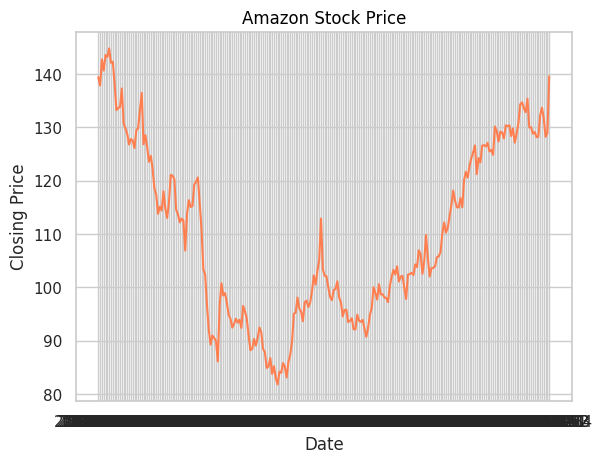

In [ ]:

sns.set(style="whitegrid", context="notebook")

sns.lineplot(x=amz['Date'], y=amz['Close'], color="coral")

plt.title('Amazon Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')

plt.show()


What was the moving average of various stocks?

In [ ]:
amz['Moving Average'] = amz['Close'].rolling(window=20).mean()
print(amz.head())

         Date    Open    High     Low   Close  Adj Close    Volume  Change  \
0  2022-08-08  142.05  144.23  138.29  139.41     139.41  52229000    2.64   
1  2022-08-09  138.05  138.95  136.21  137.83     137.83  40434700    0.22   
2  2022-08-10  142.90  144.60  141.01  142.69     142.69  54773800    0.21   
3  2022-08-11  143.86  144.49  139.76  140.64     140.64  44867300    3.22   
4  2022-08-12  142.05  143.57  140.12  143.55     143.55  47643500   -1.50   

   Moving Average  Daily Return    Trend  
0             NaN           NaN  Neutral  
1             NaN     -0.011333     Down  
2             NaN      0.035261       Up  
3             NaN     -0.014367     Down  
4             NaN      0.020691       Up  


# Visualize the change in a stock’s volume being traded, over time?

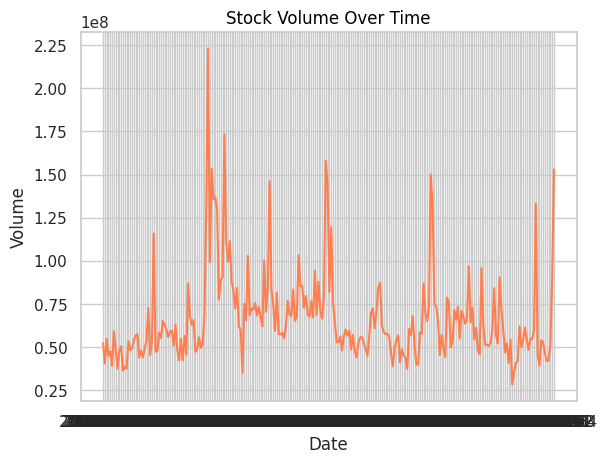

In [ ]:
sns.set(style="whitegrid", context="notebook")
sns.lineplot(x=amz['Date'], y=amz['Volume'], color="coral")
plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# What was the moving average of various stocks?

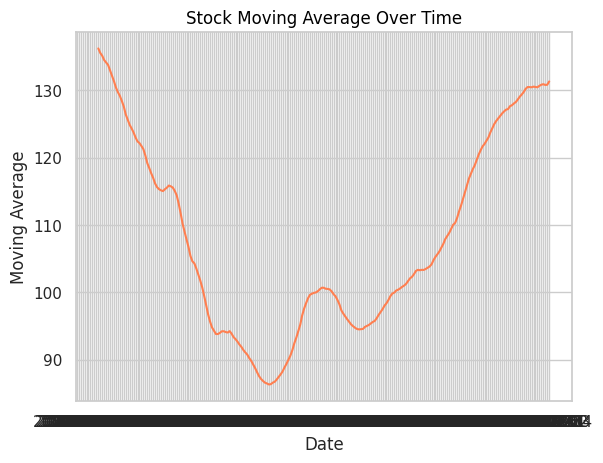

In [ ]:
sns.set(style="whitegrid", context="notebook")
sns.lineplot(x=amz['Date'], y=amz['Moving Average'], color="coral")
plt.title('Stock Moving Average Over Time')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.show()

# What was the daily return average of a stock?


In [ ]:
amz['Daily Return'] = amz['Close'].pct_change()
avg_daily_return = amz['Daily Return'].mean()
print(f'Average Daily Return: {avg_daily_return:.2%}')

Average Daily Return: 0.03%


# Add a new column ‘Trend’ whose values are based on the 'Daily Return'.

In [ ]:
def get_trend(daily_return):
    if daily_return > 0:
        return 'Up'
    elif daily_return < 0:
        return 'Down'
    else:
        return 'Neutral'

amz['Trend'] = amz['Daily Return'].apply(get_trend)
print(amz)

           Date    Open    High     Low   Close  Adj Close     Volume  Change  \
0    2022-08-08  142.05  144.23  138.29  139.41     139.41   52229000    2.64   
1    2022-08-09  138.05  138.95  136.21  137.83     137.83   40434700    0.22   
2    2022-08-10  142.90  144.60  141.01  142.69     142.69   54773800    0.21   
3    2022-08-11  143.86  144.49  139.76  140.64     140.64   44867300    3.22   
4    2022-08-12  142.05  143.57  140.12  143.55     143.55   47643500   -1.50   
..          ...     ...     ...     ...     ...        ...        ...     ...   
245  2023-07-31  133.20  133.87  132.38  133.68     133.68   41901500   -0.48   
246  2023-08-01  133.55  133.69  131.62  131.69     131.69   42098500    1.86   
247  2023-08-02  130.15  130.23  126.82  128.21     128.21   51027600    1.94   
248  2023-08-03  127.48  129.84  126.41  128.91     128.91   88585200   -1.43   
249  2023-08-04  141.06  143.63  139.32  139.57     139.57  152938700    1.49   

     Moving Average  Daily 

# Visualize trend frequency through a Pie Chart.

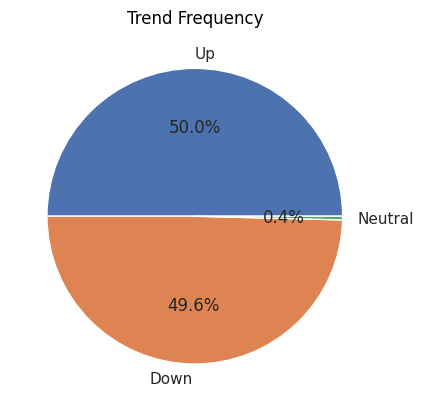

In [ ]:
trend_frequency = amz['Trend'].value_counts()
plt.pie(trend_frequency, labels=trend_frequency.index, autopct='%1.1f%%')
plt.title('Trend Frequency')
plt.show()

#  What was the correlation between the daily returns of different stocks?

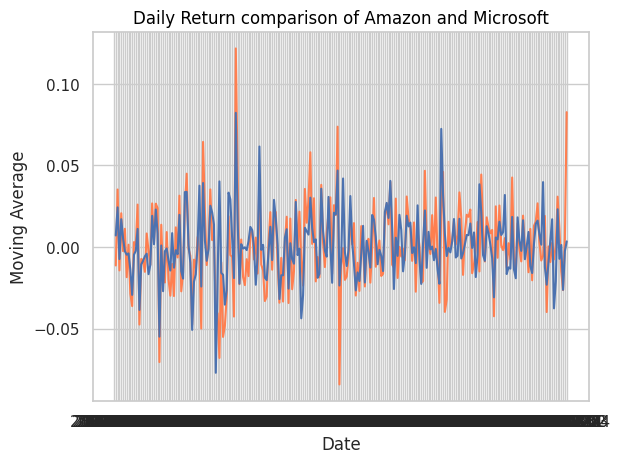

In [ ]:
#microsoft vs amzon
ms=pd.read_csv('/content/MSFT.csv')
ms['Daily Return'] = ms['Close'].pct_change()
avg_daily_return_ms = ms['Daily Return'].mean()
sns.set(style="whitegrid", context="notebook")
sns.lineplot(x=amz['Date'], y=amz['Daily Return'], color="coral")
sns.lineplot(x=amz['Date'], y=ms['Daily Return'])
plt.title('Daily Return comparison of Amazon and Microsoft')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.show()

In [ ]:
merged_data = pd.merge(amz, ms, on='Date', suffixes=('_amazon', '_microsoft'))
correlation = merged_data['Daily Return_amazon'].corr(merged_data['Daily Return_microsoft'])
print(f'Correlation: {correlation:.2f}')

Correlation: 0.69


In [ ]:
print(merged_data.head())

         Date  Open_amazon  High_amazon  Low_amazon  Close_amazon  \
0  2022-08-08       142.05       144.23      138.29        139.41   
1  2022-08-09       138.05       138.95      136.21        137.83   
2  2022-08-10       142.90       144.60      141.01        142.69   
3  2022-08-11       143.86       144.49      139.76        140.64   
4  2022-08-12       142.05       143.57      140.12        143.55   

   Adj Close_amazon  Volume_amazon  Change  Moving Average  \
0            139.41       52229000    2.64             NaN   
1            137.83       40434700    0.22             NaN   
2            142.69       54773800    0.21             NaN   
3            140.64       44867300    3.22             NaN   
4            143.55       47643500   -1.50             NaN   

   Daily Return_amazon    Trend  Open_microsoft  High_microsoft  \
0                  NaN  Neutral      284.049988      285.920013   
1            -0.011333     Down      279.640015      283.079987   
2          